The dataset chosen is the Titanic dataset. The titanic dataset contains information about the passengers aboard the RMS Titanic, which sank in its maiden voyage in 1902. The dataset includes variables such as passenger age, gender, class, fare and whether thay survived the disaster.

In [4]:
# import libraries
import seaborn as sns
import pandas as pd
import plotly.express as px
import altair as alt
from dash import Dash, dcc, html

Load the dataset and display the first few rows

In [37]:
# Load the dataset
titanic_df = pd.read_csv('Titanic.csv')

# Display the first few row
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Overview of the dataset

In [6]:
# Summary statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check for missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling missing data

In [8]:
# Fill missing values in 'Age' with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# drop the 'Cabin' column due to too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

C:\Users\skhum\AppData\Local\Temp\ipykernel_13184\455171932.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\skhum\AppData\Local\Temp\ipykernel_13184\455171932.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

**Exploratory Data Analysis (EDA)**

Find survival rate by passeger class.

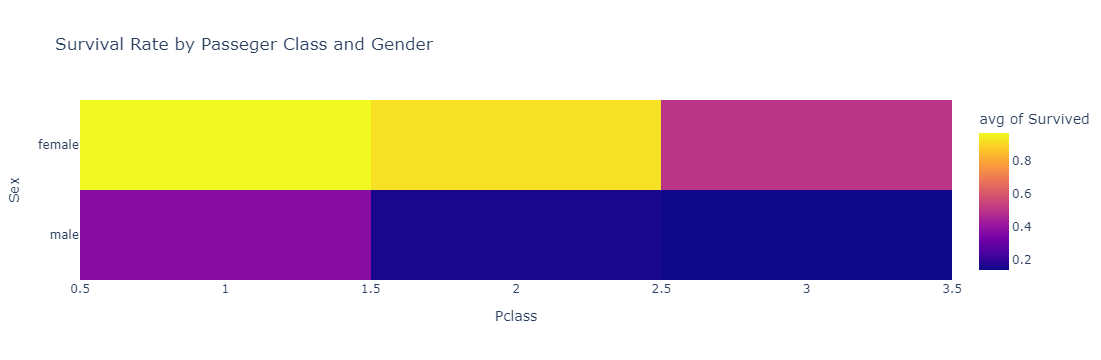

In [36]:
# Get Survival Rate by Passeger Class and Gender
fig = px.density_heatmap(titanic_df, x='Pclass', y='Sex', z='Survived', histfunc='avg',
                         title='Survival Rate by Passeger Class and Gender')
fig.show()

The data visualization highlights that, Females, particularly those in first class, had a much higher chance of survival compared to males and those in lower classes. This suggests that social status and gender played crucial roles in determining the likelihood of survival

**Survivord and Non-Survivors**

Find the survivors distribution based on age.

In [35]:
# Get age distribution of survivors and non-survivors.

chart = alt.Chart(titanic_df).mark_point().encode(x='Survived:N', y='Age:Q').properties(
    title='Age Distribution of Survivors and Non-Survivors')
chart.show()

alt.Chart(...)

The data visualization highlights the impact of age on survival rates during the Titanic disaster. Younger passengers had a higher chance of survival, which could be attributed to various factors such as physical agility, prioritization during evacuation, or accompanying adults ensuring their safety. 

**Survival rate by gender:**

In [33]:
# Create a Dash application instance
app = Dash(__name__)

# Bar chart of survival rate by gender
fig = px.bar(titanic_df, x='Sex', color='Survived', barmode='group', title='Survival Rate by Sex')

# Define the layout of gthe app
app.layout = html.Div(children=[html.H1(children='Titanic Dattaset Visualisation'),
                                dcc.Graph(id='example-grap', figure=fig)])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

The data visualization highlights a significant disparity in survival rates between males and females during the Titanic disaster. Females had a much higher chance of survival compared to males, which could be attributed to the “women and children first” policy during the evacuation. 



Get the heatmap of the average age based on the embarkation ports (C = Cherbourg, Q = Queenstown and S = Southampton)

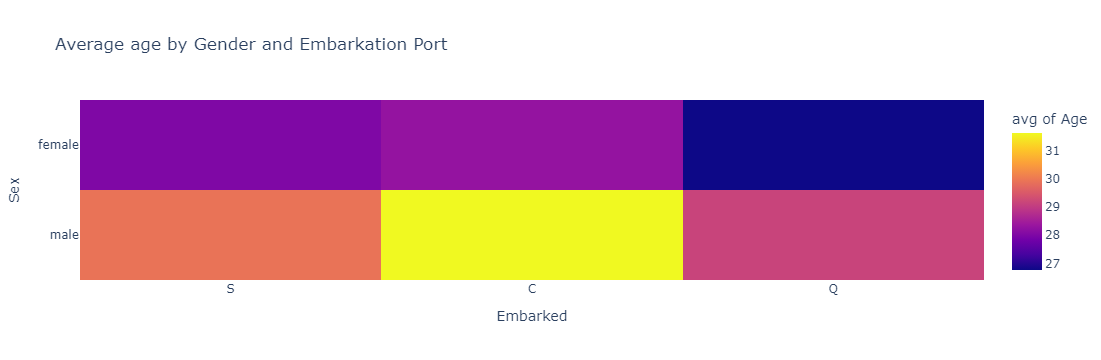

In [34]:
# Get Average age by Gender and Embarkation Port
fig = px.density_heatmap(titanic_df, x='Embarked', y='Sex', z='Age', histfunc='avg',
                         title='Average age by Gender and Embarkation Port')
fig.show()

The data visualization highlights that on average, the old people were from Cherbourg, most of young passengers were from Queenstown. and lastly the heatmap suggest that the middle aged group mostly came from Southampton.